<a href="https://colab.research.google.com/github/junginee/From-ML-to-DL/blob/main/from_preprocessing_to_model_predict_%EA%B3%A0%EB%8F%84%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/



데이터 전처리 5단계

1. 정규화로 한국어만 남기기

2. 형태소 분석기로 어간 추출하기

3. 불용어 제거하기

4. 문자를 인덱스벡터로 전환하기

5. 패딩처리하기

In [ ]:
from tensorflow.python.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.callbacks  import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import urllib.request

**1. 데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv( '/content/train_data.csv',sep='\t') 
test_data = pd.read_csv( '/content/test_data.csv',sep='\t') 

Mounted at /content/drive


**2. train 데이터 긍정 / 부정 값의 분포 확인**

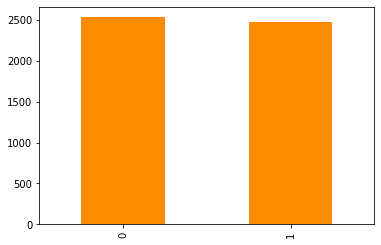

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar', color='darkorange')
plt.show()

**3. train 데이터 한글과 공백 제외하고 모두 제거**

In [ ]:
train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**4. train 데이터 빈 값을 가진 행 => Null 값으로 변경 및 제거**

In [ ]:
train_data['content'].replace('', np.nan, inplace = True) 
print(train_data.isnull().sum()) 

train_data = train_data.dropna(how = 'any')
print(len(train_data)) 

순서          0
id          0
content    17
label       0
dtype: int64
4983


- 공백은 null 값으로 변경
- 17개 결측치 존재하지 않음

**5. test 데이터 train 데이터와 동일 방법으로 전처리**

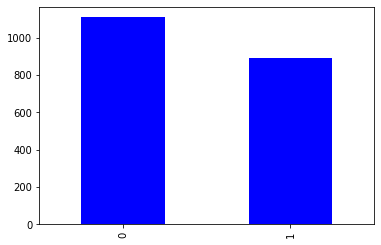

순서         0
id         0
content    1
label      0
dtype: int64
1999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
test_data['label'].value_counts().plot(kind = 'bar', color='blue')
plt.show()

test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

test_data['content'].replace('', np.nan, inplace = True) #공백은 null 값으로 변경
print(test_data.isnull().sum()) 
test_data = test_data.dropna(how = 'any')
print(len(test_data)) #1999

**6. konlpy 설치**

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 29.0 MB/s 
     |████████████████████████████████| 453 kB 59.5 MB/s 


**7. 토큰화**

In [ ]:


from konlpy.tag import Okt
from tqdm import tqdm

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','다','하','고','을','인','듯','네','지','임','게']

okt = Okt()

x_train = []
for sentence in tqdm(train_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)
print(x_train[:10])

x_test = []
for sentence in tqdm(test_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)
print( x_test[:10])

100%|██████████| 4983/4983 [00:22<00:00, 218.58it/s]


[[], [], ['귀엽다', '윤', '화씨', '두', '분다', '귀엽다'], ['소보로빵'], ['여기', '화장실', '어디', '에요', '저희', '화장실', '따로', '없다'], ['년', '월', '평일', '저녁', '방문', '알차다', '보이다', '구성', '별', '결함', '없다', '파스타', '다닥다닥', '붙다', '자리', '별', '특색', '없다', '파스타'], ['우리', '타고나다', '러너', '사장', '님', '말씀', '친절하다', '사장', '님', '매다', '님', '덕분', '많이', '배우다', '구매', '행복하다', '불다', '고맙다'], ['군', '군', '금', '있다', '자다', '모두', '궁금하다', '대한민국', '에서', '곳', '만', '있다', '그', '곳곱', '곱창', '맛', '끝내주다', '창', '참말', '로', '치다', '구만', '요'], ['군침', '주다', '자다', '사람', '벌떡', '일어나다', '그녀', '대세', '히', '밥', '거', '아시', '죠', '없다', '사랑', '애정', '히', '밥', '에게', '쏟다', '주', '세', '염', '곱창', '물론', '군자', '대', '곱창', '이지', '요', '창창하다', '앞날', '번창'], ['별로', '맛', '없다', '밍밍', '국물']]


100%|██████████| 1999/1999 [00:06<00:00, 301.37it/s]

[['음식', '사진', '보다', '많이', '달라', '요', '요리', '분', '바뀌다', '거', '같다', '다른', '안주', '짜다', '달다', '해도', '술', '자다', '들어가다', '나쁘다', '않다', '다만', '모', '찌리', '후', '실망하다', '싶다', '않다', '절대', '시키다', '말다', '그리고', '밑', '알바생', '분', '말', '공감', '가다', '지점', '장', '보이다', '분만', '광장', '히', '열심히', 'ㅋㅋ'], ['음식', '맛', '별로', '에요', '구반포역', '쪽', '식사', '때', '없다', '한번', '씩', '가다', '집', '이에요', '만두국', '시키다', '간도', '전혀', '안되다', '만두', '속', '재료', '두부', '로', '채우다', '진짜', '맛없다', '더', '황당하다', '이번', '써다', '빙하', '아주머니', '완전', '매너', '없다', '전', '있다', '아주머니', '목소리', '많이', '크다', '손님', '들어오다', '어서', '오다', '라고', '인사', '해주다', '지금', '아주머니', '손님', '들어오다', '알다', '척도', '안', '하고', '건너편', '테이블', '손님', '주문', '사장', '님', '사장', '님', '여러', '번', '부르다', '그때', '서다', '잠시', '만', '요', '라고', '응대', '하고', '갈비탕', '먹다', '김치', '더', '달라', '하니', '대답', '안', '하고', '툭', '던지다', '갖다', '음식', '먹다', '마스크', '쓸다', '준비', '계산', '대', '앞', '에서', '빨다', '쳐다보다', '빨리', '계산', '하고', '가라', '느낌', '포장', '손님', '오', '니까', '기분', '내', '키', '면', '안녕하다', '라고', '인사', '하고', '이집', '음식', '맛',

 - Okt의 stem = True를 사용하면 일정 수준의 정규화를 수행해, 단어들을 알아서 정규화 해주고, 오타도 수정해주는 기능을 가지고 있다.

- 형태소 분석기로 토큰화해준 이유는 같은 단어일지라도 형태소(예:의, 를, 가, 도 등)와 붙어있으면 기계는 전부 다른 단어로 인식하게 된다.

- 토큰이란? 문법적으로 더 이상 나눌 수 없는 언어요소

- 텍스트 토큰화? 말뭉치로부터 토큰을 분리하는 작업

**8. 정수 인코딩**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

{'먹다': 1, '안': 2, '없다': 3, '너무': 4, '있다': 5, '보다': 6, '맛': 7, '좋다': 8, '가다': 9, '맛있다': 10, '분': 11, '같다': 12, '로': 13, '아니다': 14, '이다': 15, '요': 16, '만': 17, '에서': 18, '않다': 19, '나오다': 20, '되다': 21, '오다': 22, '진짜': 23, '때': 24, '님': 25, '하고': 26, '그냥': 27, '들다': 28, '것': 29, '저': 30, '못': 31, '직원': 32, '사장': 33, '사람': 34, '받다': 35, '그렇다': 36, '곳': 37, '가격': 38, '손님': 39, '음식': 40, '그': 41, '시간': 42, '여기': 43, '더': 44, '불친절하다': 45, '영상': 46, 'ㅠㅠ': 47, '말': 48, '주다': 49, '다른': 50, '알다': 51, '나': 52, '해주다': 53, '넘다': 54, '두': 55, '주문': 56, '적': 57, '많다': 58, '시키다': 59, '친절하다': 60, '언니': 61, '별로': 62, '거': 63, '곱창': 64, '많이': 65, '자다': 66, '서': 67, '서비스': 68, '왜': 69, '나다': 70, '집': 71, '정말': 72, '일': 73, '고기': 74, '인데': 75, '기분': 76, '말다': 77, '싶다': 78, '보고': 79, '제': 80, '모르다': 81, '내': 82, '수': 83, '하나': 84, '안되다': 85, '아': 86, '밥': 87, '정도': 88, '귀엽다': 89, '면': 90, '까지': 91, '양': 92, '쓰다': 93, '랑': 94, '대': 95, '개': 96, '다시다': 97, '점': 98, '다이어트': 99, '처음': 100, 'ㅠ': 101, '생각': 102, 'ㅎ

**9. 등장 빈도수 낮은 단어 색출**

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) #단어의 수
rare_cnt = 0 #등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 #훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 #등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

#단어와 빈도수의 쌍을 key-value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value


  #단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
     rare_cnt = rare_cnt + 1
     rare_freq = rare_freq + value

print('단어 집합의 크기:' , total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수:%s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:',(rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:',(rare_freq/total_freq)*100)

단어 집합의 크기: 9632
등장 빈도가 2번 이하인 희귀 단어의 수:5967
단어 집합에서 희귀 단어의 비율: 61.94975083056479
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.051263050064298


높은 정수가 부여된 단어들은 등장 빈도 수가 매우 낮다는 것을 의미한다. 빈도수 낮은 단어들은 자연어 처리에서 배제하고자 한다. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인하고자 한다.

**10. 빈도수 낮은 단어 제거**

In [ ]:
#전체 단어 개수 중 빈도수 2이하인 단어 제거
#0번 패딩 토큰 고려하여 +1

vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 3666


등장 빈도가 2회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 하다. 따라서 이 단어들을 정수 인코딩 과정에서 배제시켰다.

**11. 텍스트 시퀀스 정수 시퀀스로 변환**

In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)

x_test = tokenizer.texts_to_sequences(x_test)

print(x_train[:10])

[[], [], [89, 1173, 1421, 55, 2128, 89], [], [43, 626, 227, 292, 488, 626, 602, 3], [264, 791, 1325, 339, 132, 2928, 150, 1174, 138, 3, 408, 2129, 758, 210, 138, 2463, 3, 408], [293, 2929, 33, 25, 503, 60, 33, 25, 1326, 25, 978, 65, 2930, 409, 459, 397, 1041], [792, 792, 1726, 5, 66, 471, 294, 1727, 18, 37, 17, 5, 41, 64, 7, 2464, 1103, 13, 295, 16], [2465, 49, 66, 34, 979, 2466, 673, 87, 63, 980, 513, 3, 296, 2931, 673, 87, 304, 2130, 574, 504, 2131, 64, 890, 1728, 95, 64, 1175, 16, 933], [62, 7, 3, 1257, 195]]


단어 집합을 케라스 토크나이즈 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환했다.

**12. 필요해 보이지 않는 컬럼 제거(순서, id)**

In [ ]:
train_data.drop(columns=['순서','id'], axis=1, inplace = True, errors='ignore')
test_data.drop(columns=['순서','id'], axis=1, inplace = True, errors='ignore')

**13. y_train과 y_test를 별도로 저장**

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

y_train과 y_test를 별도로 저장했다.

**14. 빈 샘플 제거**

In [ ]:
drop_train = [index for index, sentence in enumerate(x_train) if len(sentence)< 1]

In [ ]:
x_train = np.delete(x_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)

print(len(x_train))
print(len(y_train))

4917
4917


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만 구성되었던 데이터들은 빈 샘플이 되었다는 것을 뜻한다. 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들을 제거해주는 작업을 한다. 각 데이터들의 길이를 확인해 길이가 0인 샘플들의 인덱스를 받아왔다. 색출 후 길이가 0인 샘플들은 제거해주었고, 제거 후 개수를 확인했다.

**15. 패딩처리**

댓글 최대 길이 : 464
댓글 평균 길이 : 17.15965019320724


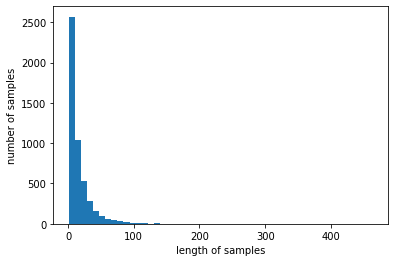

In [ ]:
print('댓글 최대 길이 :',max(len(comment) for comment in x_train))
print('댓글 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(comment) for comment in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행할것이다. 전체 데이터에서 가장 길이가 긴 comment와 전체 데이터의 길이 분포를 확인하겠다.

가장 긴 댓글 길이는 464이며, 그래프를 봤을 때 전체 데이터의 길이 분포는 대체적으로 약 100 내외의 길이를 가지는 것을 볼 수 있다. 모델이 처리할 수 있도록 x_train과 x_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있다. 특정 길이 변수를 max_len으로 정한다. 대부분의 댓글이 잘리지 않도록 할 수 있는 최적의 max_len을 판단해야 한다.

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

  
max_len = 100
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 98.92210697579826


전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수를 만들고 확인했다.

전체 훈련 데이터중 약 98.9%의 댓글이 100이하의 길이를 가지는 것을 확인했다. 따라서 모든 샘플의 길이를 100으로 맞출것이다.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

x_train.shape

(4917, 100)

**LSTM 모델**

**1. sequential 모델**

In [ ]:
#sequential 버전

# embedding_dim = 100
# hidden_units = 16
# vocab_size = 3666

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim))
# model.add(Dropout(0.2))
# model.add(LSTM(hidden_units))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

**2. 함수형 모델**

In [ ]:
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.keras import regularizers

input1 =Input(shape= (100,))        
embedding1 = Embedding(3666,5,input_length=100)(input1)
lstm1 = LSTM(8)(embedding1)
output1 = Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))(lstm1)
model = Model(inputs= input1,outputs=output1)

model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=30, callbacks=[es, mc], batch_size=256, validation_split=0.2)
end_time = time.time()-start_time

print("LSTM 시간 :", end_time)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 5)            18330     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 448       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 18,787
Trainable params: 18,787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 14s 443ms/step - loss: 0.7164 - acc: 0.5184 - val_loss: 0.7149 - val_acc: 0.4705

Epoch 00001: val_acc improved from -inf to 0.47053, saving model to best_model.h5
Epoch 2/30
16/16 [=====================

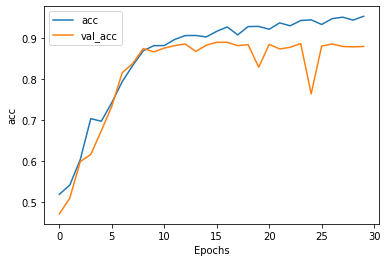

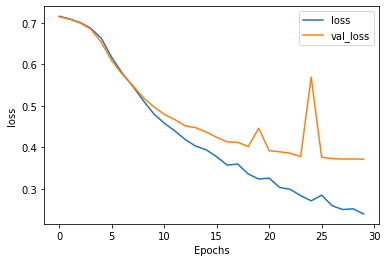

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n loss : %.3f" % (loaded_model.evaluate(x_test, y_test)[0]))
print("\n 테스트 정확도: %.2f" % (loaded_model.evaluate(x_test, y_test)[1]))

63/63 [==============================] - 2s 33ms/step - loss: 0.4138 - acc: 0.8619

 loss : 0.414
63/63 [==============================] - 2s 34ms/step - loss: 0.4138 - acc: 0.8619

 테스트 정확도: 0.86


테스트 데이터를 통해 loss 값과 정확도를 평가한다.

 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'best_model.h5'를 로드한다.

https://github.com/2runo/Curse-detection/blob/master/src/embedding.py
함수 임베딩 참고

 https://github.com/2runo/Curse-detection/blob/master/src/model.py
 함수형 모델 참고

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test)
# Get labels based on probability 1 if p>= 0.5 else 0
y_predict = []
for i in prediction:
    if i >= 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
print("Accuracy of prediction on test set : ", round(accuracy_score(y_test,y_predict),3))

Accuracy of prediction on test set :  0.832


테스트 데이터에 대한 예측 정확도

**새로운 문장 긍정/부정 예측**

In [ ]:
new_sentence = [                               ]

encoded = tokenizer.texts_to_sequences(new_sentence)#정수인코딩

padded = pad_sequences(encoded, padding='pre', maxlen=max_len) #패딩

prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(new_sentence)):
    print(new_sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)


냄새가 안나는데도 잘드시는 웅이님 대단하십니다
Predicted sentiment :  Positive
자가격리 해제되고 빨리 입맛이 돌아와서 좋은 먹방 계속 보여줬으면 해요
Predicted sentiment :  Positive
타임라인 ️0:41 육회비빔밥 한입1:16 육회비빔밥 두입02:04 육회비빔밥 세입02:16 육회비빔밥 네입2:21 설렁탕국물 한입,두입2:33 설렁탕 국물 세입2:42 설렁탕고기 한입2:48 설렁탕국물 네입3:06 자메이카치킨 첫입 3:29자메이카치킨 두입3:34자메이카 세입3:59육회비빔밥 다섯입4:15 설렁탕 국물 밥에 말아먹기 4:18 설렁탕 국물 밥에 말아먹기4:26 설렁탕국물 +밥+깍두기4:42 설렁탕 국물 밥에 말아먹기4:48~ 5:26 설렁탕 국물 밥에 말아먹기5:29 자메이카치킨 네입5:37 자메이카치킨 다섯입5:45 ~ 6:04 자메이카치킨 여섯입6:27 라면 한입
Predicted sentiment :  Negative
웅이님 이것저것 먹는모습 회복된듯합니다 축하합니다열심 먹방하세요 
Predicted sentiment :  Positive
웅이woongei님 먹방아주잘하신군요.
Predicted sentiment :  Negative
웅 형 아파서 걱정했는데..돌아와줘서 고마워 ㅠ 입맛 살아나서 찐텐 표정 지으면서 다시 행복 먹방 찍어줘
Predicted sentiment :  Positive
입맛 없으시다면서 나보다 맛있게 드신다
Predicted sentiment :  Positive
잘드시고 회복하세요~~ 3주간은 더욱 잘챙여드시구여
Predicted sentiment :  Negative
컨셉먹방으로 라면,자메이카통다리,육회비빔밥
Predicted sentiment :  Positive
오늘은 커디션이 좋아보이네요 전 3일차인데 입맛은 여전한지.... 전 살은 절대 안빠지겠어요ㅠㅠ  웅이님 고생많았어요 쾌차하시면 더 맛나는먹방 기대할께요
Predicted sentiment :  Negative
웅이형 얼

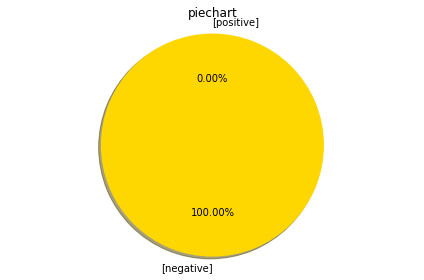

In [ ]:
total = len(positive) + len(negative)

def percentage(positive,  negative):
    return 100*float(positive)/float(total) 


count=0
positive=0
negative=0


if(new_sentence=='Positive'):
        positive += 1
else:
        negative += 1

positive=percentage(positive,100)
negative=percentage(negative,100)

labels=['[positive]', '[negative]']
sizes=[positive,negative]
colors=['yellowgreen',"gold"]
chart=plt.pie(sizes,labels=labels, startangle=90, autopct='%.2f%%',shadow=True,colors=colors)
plt.title("piechart")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)

  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  
  score = float(loaded_model.predict(pad_new)) # 예측
  
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 댓글입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 댓글입니다.\n".format((1 - score) * 100))

print('[감성분석 결과]')
sentiment_predict("쓰레기")

[감성분석 결과]
80.74% 확률로 부정 댓글입니다.

